# Vibrato Monte Carlo & Automatic differentiation

In [1]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def savefig(filename):
    plt.savefig('outputs/{}.pdf'.format(filename))

In [3]:
# Figures configuration
width = 7
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Vanilla Option BlackScholes

### Premium tests

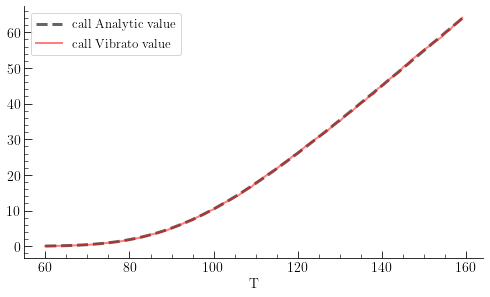

In [4]:
call_vanilla_premium_analytic = pd.read_csv('datasets/call_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
call_vanilla_premium_vibrato = pd.read_csv('datasets/call_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_vanilla_premium_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_premium_vibrato.plot(ax=ax, color='red', lw=2, alpha=.5);

### Delta tests

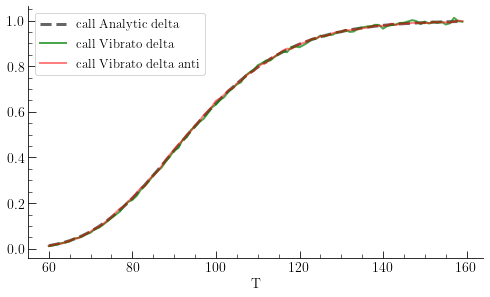

In [5]:
call_vanilla_delta_analytic = pd.read_csv('datasets/call_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato = pd.read_csv('datasets/call_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato_anti = pd.read_csv('datasets/call_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_delta_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_delta_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_delta_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Vega tests

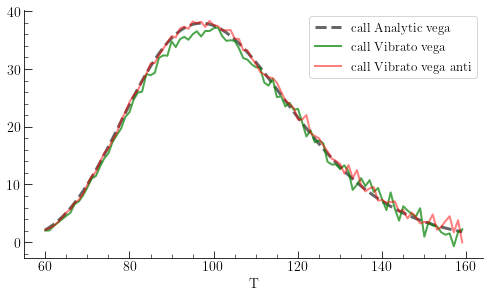

In [6]:
call_vanilla_vega_analytic = pd.read_csv('datasets/call_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato = pd.read_csv('datasets/call_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato_anti = pd.read_csv('datasets/call_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vega_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_vega_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_vega_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Rho tests

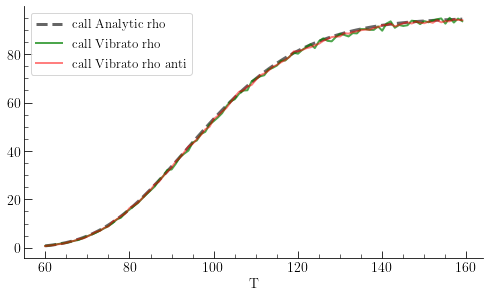

In [7]:
call_vanilla_rho_analytic = pd.read_csv('datasets/call_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato = pd.read_csv('datasets/call_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato_anti = pd.read_csv('datasets/call_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_rho_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_rho_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_rho_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Gamma

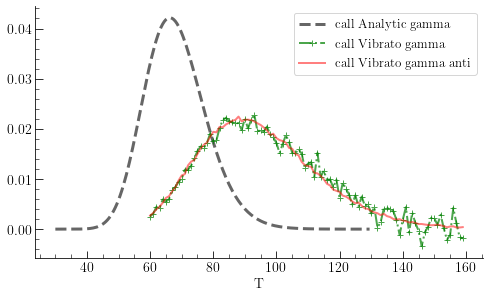

In [39]:
call_vanilla_gamma_analytic = pd.read_csv('datasets/call_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato = pd.read_csv('datasets/call_vibrato_gamma.csv', 
                                            header=None, names=['T', 'call Vibrato gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/call_vibrato_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_gamma_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7, ls='-.', marker='+');
call_vanilla_gamma_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

## Vanna

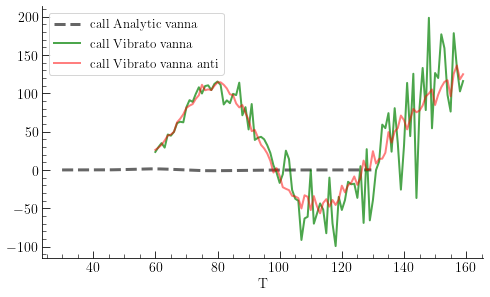

In [10]:
call_vanilla_vanna_analytic = pd.read_csv('datasets/call_analytic_vanna.csv', 
                                            header=None, names=['T', 'call Analytic vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato = pd.read_csv('datasets/call_vibrato_vanna.csv', 
                                            header=None, names=['T', 'call Vibrato vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/call_vibrato_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_vanna_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7); 
call_vanilla_vanna_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Gamma vibrato AD

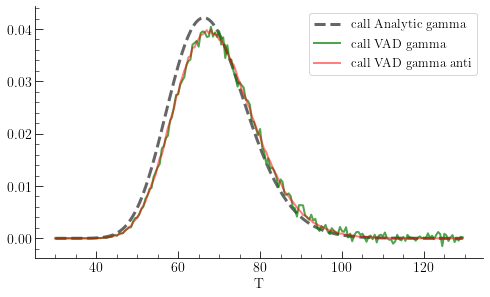

In [11]:
call_vanilla_gamma_analytic = pd.read_csv('datasets/call_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato = pd.read_csv('datasets/call_vibratoad_gamma.csv', 
                                            header=None, names=['S_t', 'call VAD gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/call_vibratoad_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call VAD gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_gamma_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_gamma_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

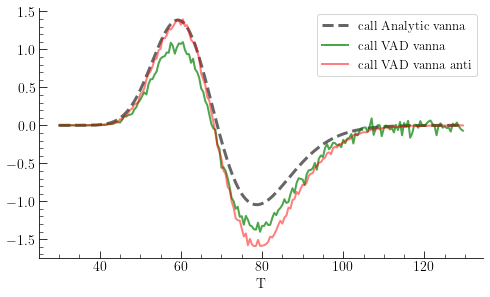

In [27]:
call_vanilla_vanna_analytic = pd.read_csv('datasets/call_analytic_vanna.csv', 
                                            header=None, names=['T', 'call Analytic vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato = pd.read_csv('datasets/call_vibratoad_vanna.csv', 
                                            header=None, names=['T', 'call VAD vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/call_vibratoad_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call VAD vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_vanna_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_vanna_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

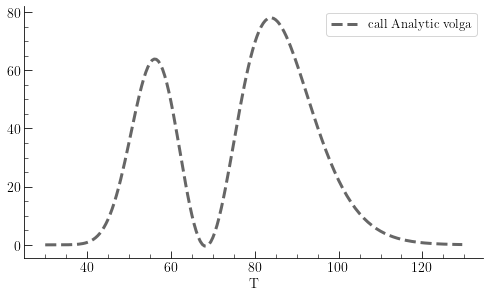

In [28]:
call_vanilla_volga_analytic = pd.read_csv('datasets/call_analytic_volga.csv', 
                                            header=None, names=['T', 'call Analytic volga'], 
                                            sep=';', index_col=0)
call_vanilla_volga_vibrato = pd.read_csv('datasets/call_vibratoad_volga.csv', 
                                            header=None, names=['T', 'call Vibrato volga'], 
                                            sep=';', index_col=0)
call_vanilla_volga_vibrato_anti = pd.read_csv('datasets/call_vibratoad_volga_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# call_vanilla_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
# call_vanilla_volga_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
# call_vanilla_volga_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);